In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ranksums
import numpy as np

In [2]:
# load shannon diversity of HC and P in weeks 0 and 38
shannon = pd.read_csv("/Users/dagmarschierova/MEGA/MBÚ/TNF/NGS/runs_merged/outputs/qiime_results_B/diversity_HCP_week038/alpha/shannon.tsv",
                      sep='\t', skiprows=[1], index_col="SampleID")
shannon

,shannon_entropy
SampleID,
1_BA_1,5.245602
1_BA_8,5.470327
10_VM_1,6.145995
10_VM_7,6.273734
14_MM_1,5.578380
...,...
P75_SM_8,5.985232
P77_5J_8,5.746238
P77_VJ_1,4.867397


In [3]:
# load metadata
metadata = pd.read_csv("/Users/dagmarschierova/MEGA/MBÚ/TNF/NGS/runs_merged/inputs/metadata_stool.tsv",
                       sep='\t', skiprows=[1], index_col="#SampleID")
metadata

,Label,Plate,Position,Patient,Age,Sex,Height,Weight,BMI,BMI_category,...,Response_scale3_Start_end,Dg_Response_scale2_Start_end,Disease_severity_scale2_Start_end,Disease_severity_scale4_Start_end,Response_scale2_Start_end_combined,Response_scale3_Start_end_combined,Dg_Response_scale2_Start_end_combined,Disease_severity_scale2_Start_end_combined,Disease_severity_scale4_Start_end_combined,Dg_Week38
#SampleID,,,,,,,,,,,,,,,,,,,,,
1_BA_1,1_BA_1,B1,A1,P1,25.0,F,170.0,77.0,26.6,overweight,...,baseline_start,CD_no_response_start,inactive_start,mild_start,no_response_start,baseline_start,CD_no_response_start,inactive_start,mild_start,CD_week_0
1_BA_2,1_BA_2,B1,B1,P1,25.0,F,170.0,77.0,26.6,overweight,...,full_response_NA,CD_response_NA,inactive_NA,remission_NA,response_NA,full_response_NA,CD_response_NA,inactive_NA,remission_NA,CD_week_2
1_BA_3,1_BA_3,B1,C1,P1,25.0,F,170.0,78.0,27.0,overweight,...,full_response_NA,CD_response_NA,inactive_NA,remission_NA,response_NA,full_response_NA,CD_response_NA,inactive_NA,remission_NA,CD_week_8
1_BA_4,1_BA_4,B1,D1,P1,25.0,F,170.0,79.0,27.3,overweight,...,full_response_NA,CD_response_NA,inactive_NA,remission_NA,response_NA,full_response_NA,CD_response_NA,inactive_NA,remission_NA,CD_week_14
1_BA_5,1_BA_5,B1,E1,P1,25.0,F,170.0,80.0,27.7,overweight,...,full_response_NA,CD_response_NA,inactive_NA,remission_NA,response_NA,full_response_NA,CD_response_NA,inactive_NA,remission_NA,CD_week_22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mock_4_DNA,mock_4_DNA,B2,B12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21_PP_8_ADA,21_PP_8_ADA,B2,E12,P21_ADA,25.0,F,165.0,64.0,23.5,normal,...,NaN,CD_NA,NaN,NaN,NaN,NaN,CD_NA,NaN,NaN,CD_NA
P72_DM_7,P72_DM_7,B2,F12,P72,34.0,F,175.0,56.0,18.3,underweight,...,full_response_end,CD_response_end,inactive_end,remission_end,response_end,full_response_end,CD_response_end,inactive_end,remission_end,CD_week_38


In [4]:
# merge pca with metadata
metadata = metadata.merge(shannon, how='inner', left_index=True, right_index=True)
metadata

,Label,Plate,Position,Patient,Age,Sex,Height,Weight,BMI,BMI_category,...,Dg_Response_scale2_Start_end,Disease_severity_scale2_Start_end,Disease_severity_scale4_Start_end,Response_scale2_Start_end_combined,Response_scale3_Start_end_combined,Dg_Response_scale2_Start_end_combined,Disease_severity_scale2_Start_end_combined,Disease_severity_scale4_Start_end_combined,Dg_Week38,shannon_entropy
1_BA_1,1_BA_1,B1,A1,P1,25.0,F,170.0,77.0,26.6,overweight,...,CD_no_response_start,inactive_start,mild_start,no_response_start,baseline_start,CD_no_response_start,inactive_start,mild_start,CD_week_0,5.245602
1_BA_8,1_BA_8,B1,H1,P1,25.0,F,170.0,81.0,28.0,overweight,...,CD_no_response_end,inactive_end,mild_end,no_response_end,no_response_end,CD_no_response_end,inactive_end,mild_end,CD_week_38,5.470327
6_HP_1,6_HP_1,B1,B3,P6,41.0,M,186.0,74.0,21.4,normal,...,UC_response_start,inactive_start,mild_start,response_start,baseline_start,UC_response_start,inactive_start,mild_start,UC_week_0,5.050656
6_HP_8,6_HP_8,B1,A4,P6,41.0,M,186.0,77.0,22.3,normal,...,UC_response_end,inactive_end,remission_end,response_end,full_response_end,UC_response_end,inactive_end,remission_end,UC_week_38,5.837628
7_DL_1,7_DL_1,B1,B4,P7,44.0,F,165.0,54.0,19.8,normal,...,CD_response_start,inactive_start,remission_start,response_start,baseline_start,CD_response_start,inactive_start,remission_start,CD_week_0,5.838977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K11_1,K11_1,B2,A10,HC11,31.0,M,200.0,80.0,20.0,normal,...,HC,HC,HC,HC,HC,HC,HC,HC,HC,5.490186
K11_4,K11_4,B2,D10,HC11,31.0,M,200.0,80.0,20.0,normal,...,HC,HC,HC,HC,HC,HC,HC,HC,HC,5.499483
K9_1,K9_1,B2,E10,HC9,39.0,F,179.0,70.0,21.8,normal,...,HC,HC,HC,HC,HC,HC,HC,HC,HC,5.709522
K9_4,K9_4,B2,H10,HC9,39.0,F,179.0,70.0,21.8,normal,...,HC,HC,HC,HC,HC,HC,HC,HC,HC,6.589829


In [5]:
convert_dict = {'shannon_entropy': float}  
shannon = shannon.astype(convert_dict)
print(shannon.dtypes)

shannon_entropy    float64
dtype: object


In [6]:
cd = metadata[metadata['Dg']=='CD']
uc = metadata[metadata['Dg']=='UC']
hc = metadata[metadata['Dg']=='HC']
cdhc = metadata[(metadata['Dg']=='CD') | (metadata['Dg']=='HC')]
uchc = metadata[(metadata['Dg']=='UC') | (metadata['Dg']=='HC')]

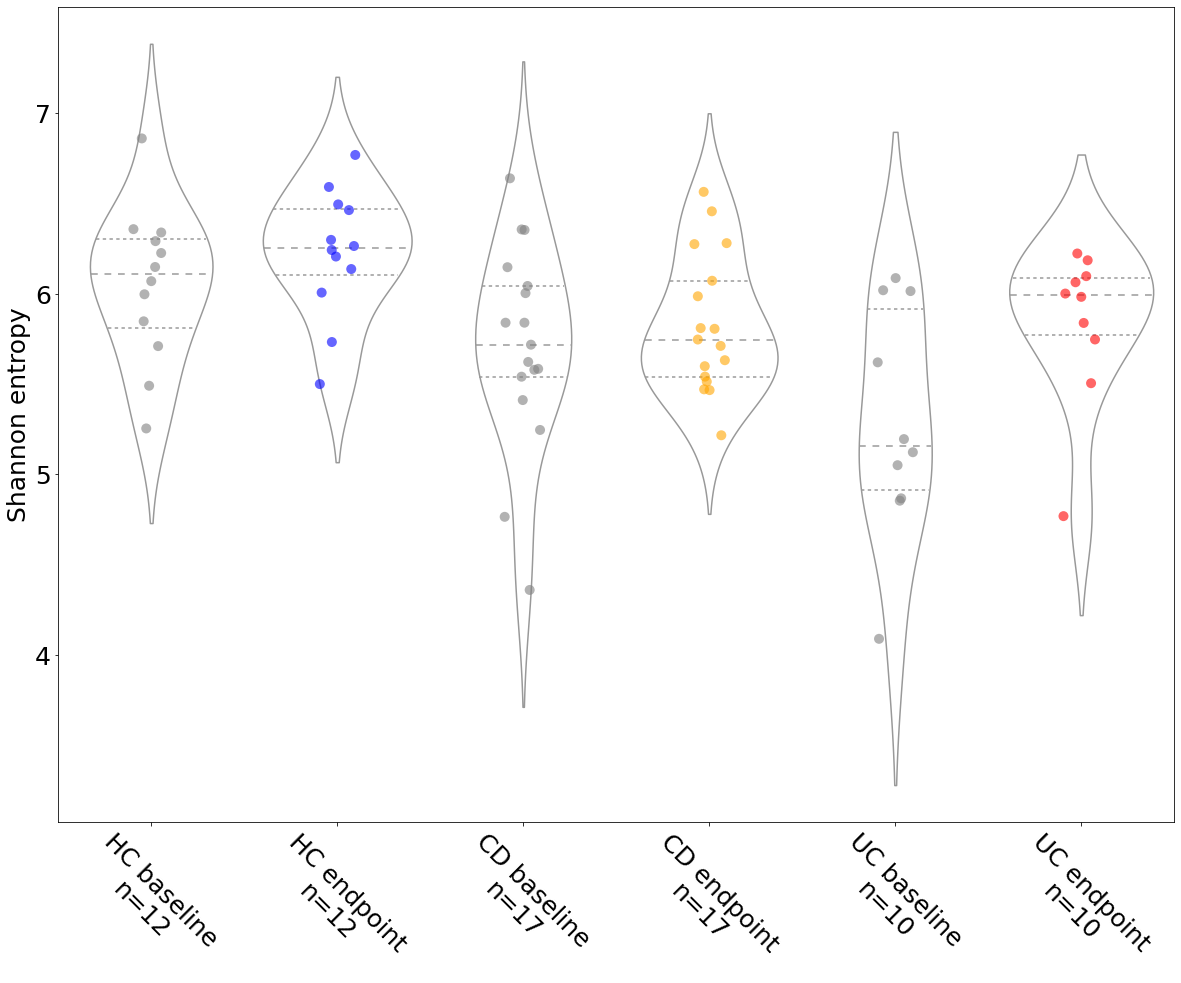

In [7]:
f1, (ax1) = plt.subplots(1, 1, figsize=(20, 15))

sns.violinplot(ax=ax1, data=metadata, x='Dg_Week', y='shannon_entropy', color='white', inner='quartile',
              order=["HC_week_0","HC_week_28","CD_week_0","CD_week_38","UC_week_0","UC_week_38"])
sns.stripplot(ax=ax1, data=metadata, x="Dg_Week", y="shannon_entropy", size=10, alpha=.6, 
              order=["HC_week_0","HC_week_28","CD_week_0","CD_week_38","UC_week_0","UC_week_38"],
              palette=['grey','blue','grey','orange','grey','red'])
ax1.set_ylabel('Shannon entropy', fontsize=25)
ax1.set_xlabel('')
ax1.set_xticklabels(["HC baseline\nn=12","HC endpoint\nn=12","CD baseline\nn=17","CD endpoint\nn=17",
                     "UC baseline\nn=10","UC endpoint\nn=10"])
ax1.tick_params(axis='both', labelsize=25)
plt.setp(ax1.get_xticklabels(), rotation=-45)


# save figure
f1.savefig('/Users/dagmarschierova/MEGA/MBÚ/TNF/NGS/runs_merged/outputs/qiime_results_B/diversity_HCP_week038/shannon-Dg_Week.png')


In [8]:
hc0 = hc[hc['Week']=='week_0']
hc28 = hc[hc['Week']=='week_28']
cd0 = cd[cd['Week']=='week_0']
cd38 = cd[cd['Week']=='week_38']
uc0 = uc[uc['Week']=='week_0']
uc38 = uc[uc['Week']=='week_38']

In [9]:
ranksums(hc0['shannon_entropy'], hc28['shannon_entropy'])

RanksumsResult(statistic=-1.1547005383792515, pvalue=0.24821307898992373)

In [10]:
ranksums(cd0['shannon_entropy'], cd38['shannon_entropy'])

RanksumsResult(statistic=-0.29277002188455997, pvalue=0.7696979437812898)

In [11]:
ranksums(uc0['shannon_entropy'], uc38['shannon_entropy'])

RanksumsResult(statistic=-1.8142294704442907, pvalue=0.06964240479832813)

In [12]:
ranksums(cd0['HBI_num'], cd38['HBI_num'])

RanksumsResult(statistic=0.378878851850607, pvalue=0.7047778292539938)

In [13]:
ranksums(uc0['pMayo_num'], uc38['pMayo_num'])

RanksumsResult(statistic=2.721344205666436, pvalue=0.006501702373081825)

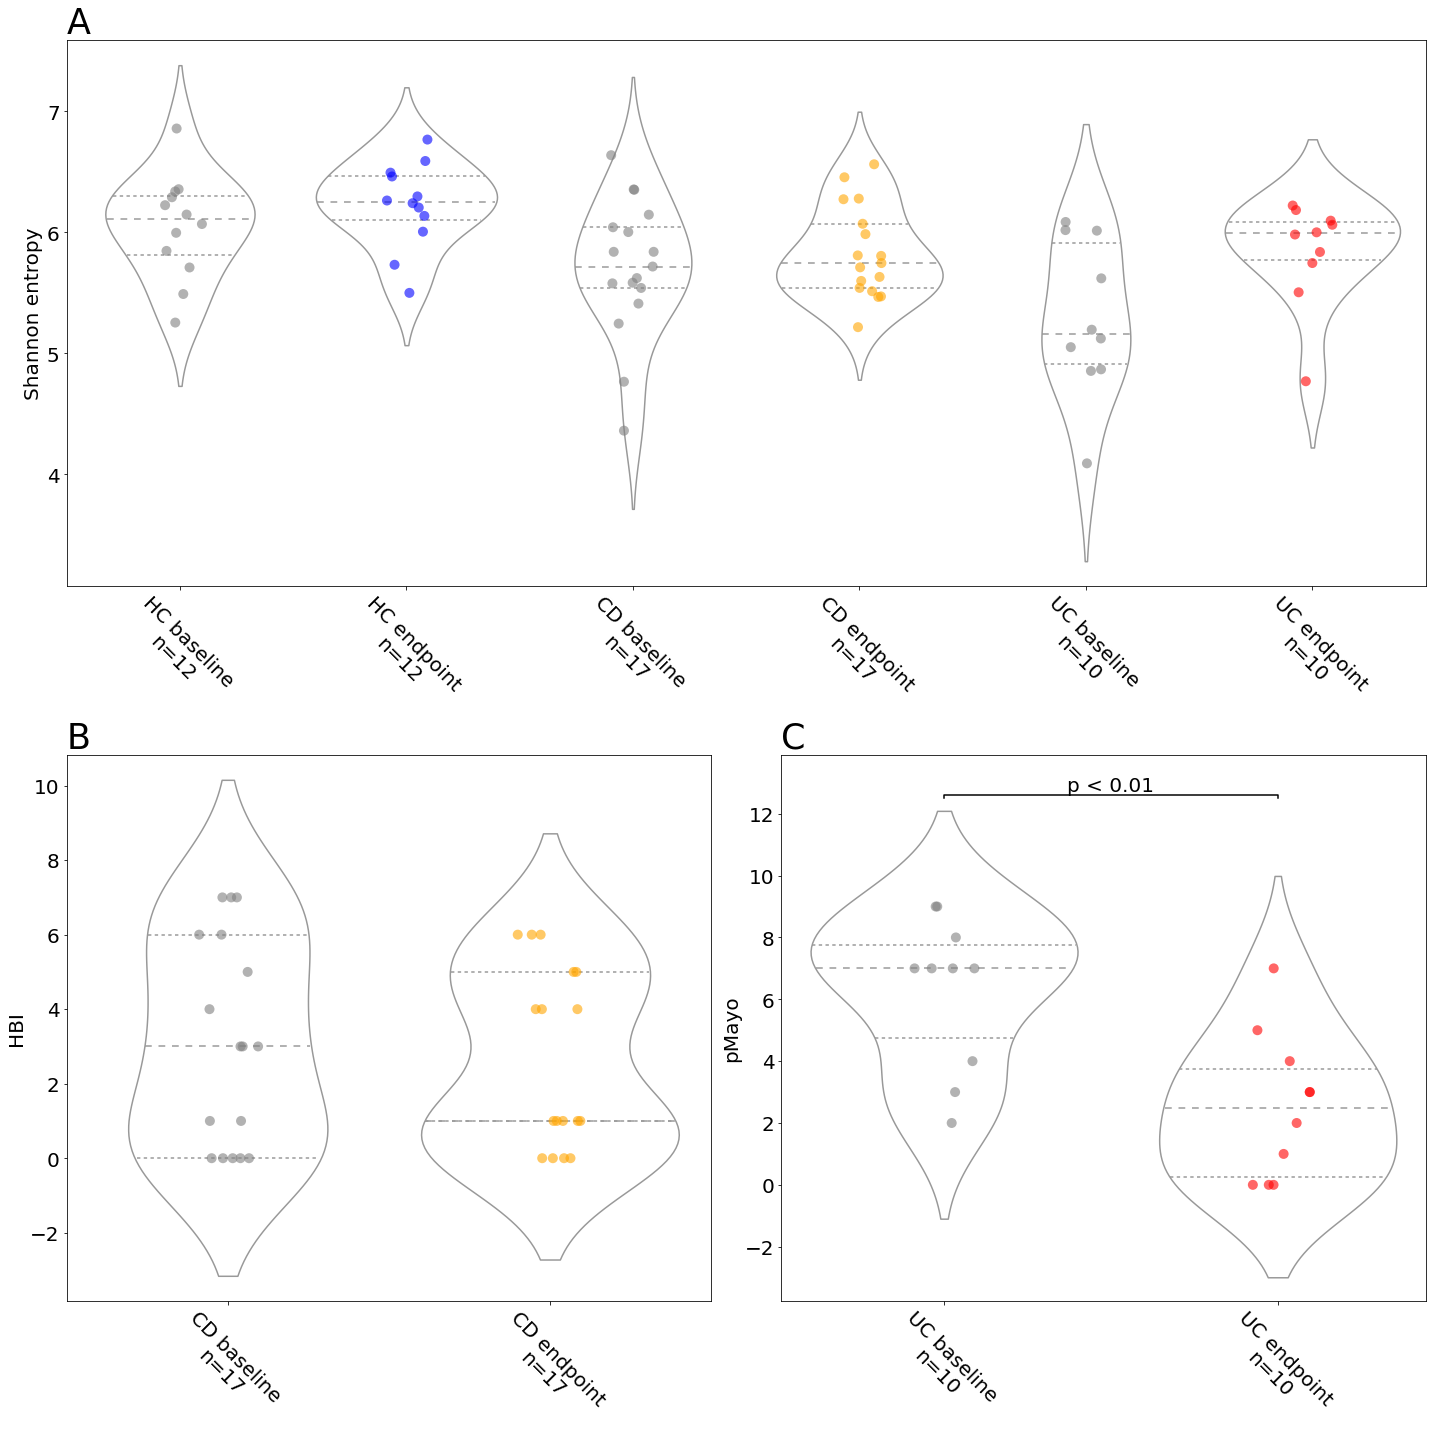

In [14]:
# create grid for subplots
fig2 = plt.figure()
fig2.set_figheight(20)
fig2.set_figwidth(20)

ax1 = plt.subplot2grid(shape=(2, 2), loc=(0, 0), colspan=2)
ax2 = plt.subplot2grid(shape=(2, 2), loc=(1, 0), colspan=1)
ax3 = plt.subplot2grid(shape=(2, 2), loc=(1, 1), colspan=1)

# plot Shannon entropy
sns.violinplot(ax=ax1, data=metadata, x='Dg_Week', y='shannon_entropy', color='white', inner='quartile',
              order=["HC_week_0","HC_week_28","CD_week_0","CD_week_38","UC_week_0","UC_week_38"])
sns.stripplot(ax=ax1, data=metadata, x="Dg_Week", y="shannon_entropy", size=10, alpha=.6, 
              order=["HC_week_0","HC_week_28","CD_week_0","CD_week_38","UC_week_0","UC_week_38"],
              palette=['grey','blue','grey','orange','grey','red'])
ax1.set_ylabel('Shannon entropy', fontsize=20)
ax1.set_xlabel('')
ax1.set_xticklabels(["HC baseline\nn=12","HC endpoint\nn=12","CD baseline\nn=17","CD endpoint\nn=17",
                     "UC baseline\nn=10","UC endpoint\nn=10"])
ax1.tick_params(axis='both', labelsize=20)
plt.setp(ax1.get_xticklabels(), rotation=-45)

# plot CD patinets HBI
sns.violinplot(ax=ax2, data=cd, x='Week', y='HBI_num', color='white', inner='quartile')
sns.stripplot(ax=ax2, data=cd, x="Week", y="HBI_num", size=10, alpha=.6, palette=['grey','orange'])
ax2.set_ylabel('HBI', fontsize=20)
ax2.set_xlabel('')
ax2.set_xticklabels(["CD baseline\nn=17","CD endpoint\nn=17"])
ax2.tick_params(axis='both', labelsize=20)
plt.setp(ax2.get_xticklabels(), rotation=-45)

# plot UC patinets pMayo
sns.violinplot(ax=ax3, data=uc, x='Week', y='pMayo_num', color='white', inner='quartile')
sns.stripplot(ax=ax3, data=uc, x="Week", y="pMayo_num", size=10, alpha=.6, palette=['grey','red'])
ax3.set_ylabel('pMayo', fontsize=20)
ax3.set_xlabel('')
ax3.set_xticklabels(["UC baseline\nn=10","UC endpoint\nn=10"])
ax3.tick_params(axis='both', labelsize=20)
ax3.set_ylim(ymax=13.9)
plt.setp(ax3.get_xticklabels(), rotation=-45)

# add titles
ax1.set_title("A", fontsize=35, loc='left')
ax2.set_title("B", fontsize=35, loc='left')
ax3.set_title("C", fontsize=35, loc='left')

# statistical annotation
x1, x2 = 0, 1
y, h, col = uc['pMayo_num'].max() + 3.5, .1, 'k'
ax3.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax3.text((x1+x2)*.5, y+h, "p < 0.01", ha='center', va='bottom', color=col, fontsize=20)

plt.tight_layout()

# save figure
fig2.savefig('/Users/dagmarschierova/MEGA/MBÚ/TNF/NGS/runs_merged/outputs/qiime_results_B/diversity_HCP_week038/shannon-Dg_Week_plus_scores.png')

